<a href="https://colab.research.google.com/github/Mbonyumugisha-Prince/assignmentDataSet/blob/main/Assignment_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


In [48]:
# Load the dataset from GitHub
url = "https://raw.githubusercontent.com/Mbonyumugisha-Prince/assignmentDataSet/main/Data_Africa.csv"

df = pd.read_csv(url)

# Display first 5 rows
df.head()



,ID,Year,Country,Continent,Population,GDP (USD)
0,1,2000,Uganda,East Africa,23303189,6.193247e+09
1,2,2001,Uganda,East Africa,24022603,5.840504e+09
2,3,2002,Uganda,East Africa,24781316,5.840504e+09
3,4,2003,Uganda,East Africa,25577246,6.606884e+09
4,5,2004,Uganda,East Africa,26403221,7.939488e+09


In [49]:
# Shape of the dataset
df.shape


(1334, 6)

In [50]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1334 non-null   int64  
 1   Year         1334 non-null   int64  
 2   Country      1334 non-null   object 
 3   Continent    1334 non-null   object 
 4   Population   1334 non-null   int64  
 5   GDP (USD)    1179 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 62.7+ KB


In [52]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

df.columns



Index(['ID', 'Year', 'Country', 'Continent', 'Population', 'GDP (USD)'], dtype='object')

In [54]:
# Display missing values in each column
df.isnull().sum()

,0
ID,0
Year,0
Country,0
Continent,0
Population,0
GDP (USD),155


In [56]:
# Identify numeric and non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

print("Non-numeric columns:", non_numeric_cols)
print("Numeric columns:", numeric_cols)


Non-numeric columns: Index(['Country', 'Continent'], dtype='object')
Numeric columns: Index(['ID', 'Year', 'Population', 'GDP (USD)'], dtype='object')


In [58]:
# Select only numeric columns for PCA
df_numeric = df[numeric_cols]
df_numeric.head()

,ID,Year,Population,GDP (USD)
0,1,2000,23303189,6.193247e+09
1,2,2001,24022603,5.840504e+09
2,3,2002,24781316,5.840504e+09
3,4,2003,25577246,6.606884e+09
4,5,2004,26403221,7.939488e+09


In [60]:
# Check missing values before imputation
df_numeric.isnull().sum()

,0
ID,0
Year,0
Population,0
GDP (USD),155


In [63]:
# Fill missing GDP values using mean imputation
df_numeric.loc[:, "GDP (USD)"] = df_numeric["GDP (USD)"].fillna(
    df_numeric["GDP (USD)"].mean()
)


In [65]:
# Verify missing values after imputation
df_numeric.isnull().sum()

,0
ID,0
Year,0
Population,0
GDP (USD),0


In [67]:
# Convert dataframe to NumPy array
X = df_numeric.values
# Center the data (subtract mean)
mean = np.mean(X, axis=0)
X_centered = X - mean

In [68]:
# Compute covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)
cov_matrix

array([[1.48407500e+05, 4.40330083e+01, 2.49000045e+08, 1.35853811e+12],
       [4.40330083e+01, 4.40330083e+01, 2.04297343e+07, 7.68250330e+10],
       [2.49000045e+08, 2.04297343e+07, 7.96135053e+14, 1.52958543e+18],
       [1.35853811e+12, 7.68250330e+10, 1.52958543e+18, 5.43561882e+21]])

In [69]:
# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([5.43561925e+21, 3.65709037e+14, 1.48019379e+05, 4.29390631e+01]),
 array([[ 2.49932903e-10,  3.64478865e-07, -9.99999986e-01,
          1.64880899e-04],
        [ 1.41340299e-11,  3.25090302e-09, -1.64878246e-04,
         -9.99999986e-01],
        [ 2.81400431e-04, -9.99999960e-01, -3.64479197e-07,
         -3.19166757e-09],
        [ 9.99999960e-01,  2.81400431e-04,  3.52499355e-10,
          1.49906544e-11]]))

In [70]:
# Sort eigenvalues in descending order
idx = np.argsort(eigenvalues)[::-1]

eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

eigenvalues


array([5.43561925e+21, 3.65709037e+14, 1.48019379e+05, 4.29390631e+01])

In [72]:
# Select first two principal components
k = 2
W = eigenvectors[:, :k]

# Project data
X_pca = X_centered @ W


In [73]:
# Calculate explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

explained_variance, cumulative_variance

(array([9.99999933e-01, 6.72801010e-08, 2.72313718e-17, 7.89957099e-21]),
 array([0.99999993, 1.        , 1.        , 1.        ]))

In [75]:
# Select number of components explaining at least 90% variance
threshold = 0.90
num_components = np.argmax(cumulative_variance >= threshold) + 1

num_components

# Project data using optimal number of components
W_opt = eigenvectors[:, :num_components]
X_pca_opt = X_centered @ W_opt


In [78]:
# Optimize memory usage for large datasets
X_centered = X_centered.astype(np.float32)

# Benchmark eigen decomposition
start = time.time()
np.linalg.eig(cov_matrix)
end = time.time()

print("Eigen decomposition time:", end - start)


Eigen decomposition time: 0.0002636909484863281


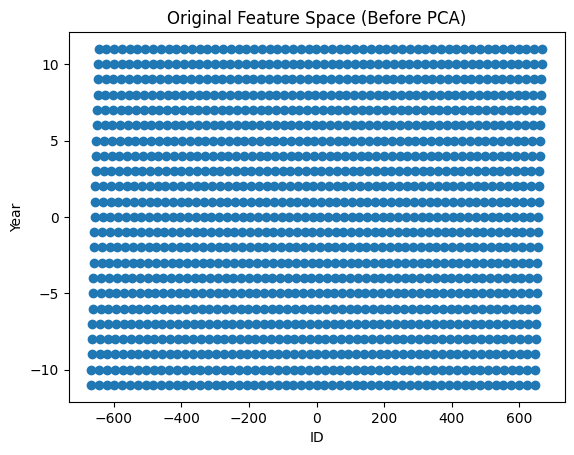

In [79]:
plt.scatter(X_centered[:, 0], X_centered[:, 1])
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.title("Original Feature Space (Before PCA)")
plt.show()


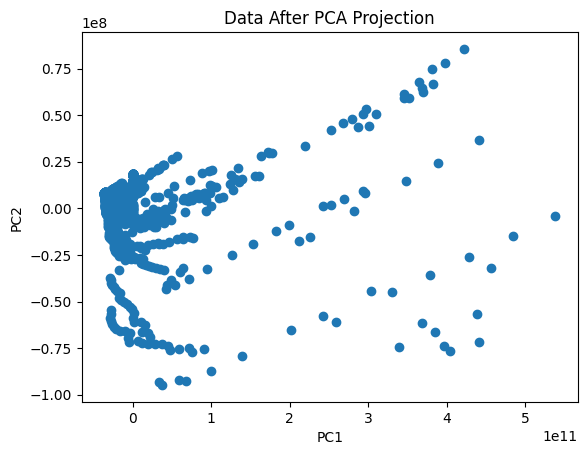

In [80]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data After PCA Projection")
plt.show()
